## Installing MNE

In [ ]:
!pip install mne

## Reading one dataset
### We are using this dataset: https://www.kaggle.com/dqmonn/personal-eeg-tasks

In [ ]:
#Importing from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

In [ ]:
import mne
import pandas as pd
import os
import matplotlib.pyplot as plt


#Reading one file
path = "/content/data/01uta.csv"
df = pd.read_csv(path)
df


,timestamp,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3,concentration
0,1543421837,2.457797,1.670815,0.971772,7.503653,8.018853,3.337516,1.463929,0.552389,5.624531,4.807890,1.087653,0.965058,0.301345,2.819282,2.657543,5.089558,2.124802,1.327723,2.870171,3.531350,0.7
1,1543421838,7.278750,3.281481,1.597924,12.071848,14.154646,1.783385,0.915233,0.414548,1.881122,2.811120,1.381587,0.782375,0.407528,1.370937,0.977480,3.755548,2.884407,1.547916,15.070847,11.062639,0.7
2,1543421838,2.464989,1.866851,1.312936,13.637771,9.638646,2.827913,1.369532,0.524057,5.195112,6.626342,1.240363,0.928681,0.503707,2.907700,3.667357,5.135420,1.993292,1.393520,6.241178,11.484470,0.7
3,1543421839,1.870220,1.823971,1.210935,10.574000,4.712053,3.122079,1.137524,0.516992,6.416479,5.014959,1.250427,0.852920,0.371187,2.679052,2.901553,3.919021,2.392887,1.707030,5.713234,6.814762,0.7
4,1543421839,3.427257,1.716824,1.053839,5.442770,7.256282,4.743657,1.566512,0.670371,5.014369,7.079632,2.455614,2.144019,0.687826,6.859645,10.960431,4.149160,2.267537,1.423119,4.041263,7.076259,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1543421868,2.501592,1.899136,0.831537,7.287555,3.250146,2.789635,1.279087,0.535059,4.764756,3.989755,3.253160,1.606658,0.722713,4.594727,4.394063,4.257141,1.352162,1.302274,10.526776,8.561098,0.7
63,1543421869,3.908333,2.337781,1.115968,5.301350,6.775457,3.840297,1.895909,0.650917,6.521565,5.791237,1.061830,1.470761,0.564288,6.934895,6.078907,4.564817,1.413933,1.284582,5.854986,7.234146,0.7
64,1543421869,5.367963,2.802032,0.891601,2.805383,3.514531,4.033522,1.098476,0.407722,3.760828,3.888979,3.733721,1.597448,0.594971,5.954776,4.700396,6.111010,2.745140,1.514938,6.048419,9.216565,0.7
65,1543421870,3.783655,1.705671,1.222994,7.489910,11.148581,7.838331,1.723844,0.675010,6.446535,9.536837,5.063681,1.065747,0.405542,3.621515,4.811797,7.536380,2.445016,1.435928,6.859429,10.486379,0.7


## Reading and concatenating all the datasets

In [ ]:
glued_data = pd.DataFrame()
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))
        glued_data = pd.concat([glued_data,df],axis=0)
glued_data

,timestamp,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3,concentration
0,1542127244,9.519776,2.040723,3.203356,15.368983,9.934692,1.593588,0.783191,0.379206,2.731298,3.510963,1.281448,1.046729,0.484853,3.010009,2.047416,6.074026,4.886942,5.790191,13.246192,11.807098,1.0
1,1542127245,2.691036,1.412461,1.761308,5.009871,6.084342,1.946037,1.119585,0.427170,2.730288,1.910549,1.508920,0.960493,0.478979,1.619538,1.572088,5.319075,3.008779,5.810209,6.713846,8.548983,1.0
2,1542127245,1.665384,1.645065,1.905416,15.686242,11.228881,0.736539,1.232634,0.700285,5.646490,5.903994,2.730805,1.540105,0.618704,6.687969,4.937399,5.307026,2.068972,5.519427,12.051471,9.974012,1.0
3,1542127246,6.704286,3.131510,3.077114,14.965178,16.681842,3.979727,1.331120,0.560819,13.965685,7.873419,6.359207,1.925431,0.882297,8.767475,3.716841,7.364262,3.879460,5.477259,10.939847,11.358926,1.0
4,1542127246,2.957472,1.357548,1.921097,4.443152,3.711718,1.840165,1.252548,0.496840,4.499410,4.830836,5.840734,2.359668,1.135686,5.050526,8.257578,5.184676,2.261491,5.477202,2.925507,6.215756,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,1542210766,5.422159,2.774181,5.326853,8.044552,8.605401,1.677383,1.483780,0.744998,7.603328,5.878838,1.354238,1.541994,0.663284,4.167730,2.039141,5.272535,4.975363,11.774189,10.611003,8.197350,0.8
56,1542210767,3.601459,2.496973,5.092552,7.220917,5.052296,6.014452,2.664929,1.102797,1.985335,4.250933,2.789452,1.709372,0.631028,5.895258,5.187459,6.814196,4.030934,10.201582,10.166777,9.296257,0.8
57,1542210767,4.770454,2.526336,5.060671,4.641261,3.007379,4.636757,1.903334,0.798974,7.529552,5.109939,2.335634,1.115512,0.609170,5.166543,3.446327,6.546083,4.436665,12.204018,5.811351,5.918770,0.8
58,1542210768,3.927918,2.538750,4.967421,6.829293,5.416744,1.781471,1.305217,0.895309,5.468817,2.559249,4.450877,1.992115,0.824031,8.642052,3.695624,4.993466,3.658976,11.806581,13.152894,11.768435,0.8


### Extracting the column names

In [ ]:

cols = glued_data.columns
cols

Index(['timestamp', 'alpha0', 'beta0', 'gamma0', 'delta0', 'theta0', 'alpha1',
       'beta1', 'gamma1', 'delta1', 'theta1', 'alpha2', 'beta2', 'gamma2',
       'delta2', 'theta2', 'alpha3', 'beta3', 'gamma3', 'delta3', 'theta3',
       'concentration'],
      dtype='object')

### Extracting the indexes

In [ ]:
inds = glued_data.index
inds

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64', length=7243)

### Extracting the shape (Size) of the glued dataset

In [ ]:
shape = glued_data.shape
shape

(7243, 22)

#### Checking the dtypes of the glued dataset

In [ ]:
glued_data.dtypes

timestamp          int64
alpha0           float64
beta0            float64
gamma0           float64
delta0           float64
theta0           float64
alpha1           float64
beta1            float64
gamma1           float64
delta1           float64
theta1           float64
alpha2           float64
beta2            float64
gamma2           float64
delta2           float64
theta2           float64
alpha3           float64
beta3            float64
gamma3           float64
delta3           float64
theta3           float64
concentration    float64
dtype: object

### Extracting a description of the glued dataset
From here we can extract important statistical values like the mean, the standard deviation, the minimum and maximum of each colmun and the quartiles

In [ ]:
descr = glued_data.describe()
descr

,timestamp,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3,concentration
count,7.243000e+03,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000
mean,1.543369e+09,5.326987,2.318826,2.071164,10.160318,8.453414,2.870674,1.323259,0.622554,5.578872,4.396807,4.395317,2.153537,1.983578,7.184128,6.202209,6.067597,2.920872,3.978217,10.594843,10.368980,0.577551
std,1.235540e+06,6.172047,2.432313,2.502572,17.418539,11.763472,2.334589,0.910225,0.613659,8.675587,4.661946,8.365258,4.146346,6.038871,15.273376,12.706690,5.696528,2.740139,4.440584,14.017076,13.128843,0.361303
min,1.542040e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.322051,0.390864,0.212113,0.230244,0.274441,0.000000,0.000000,0.000000,0.000000,0.000000,0.767963,0.749085,0.569935,0.250963,1.096881,0.000000
25%,1.542211e+09,3.396990,1.631523,1.043713,4.836360,4.540873,1.583826,0.966952,0.448160,2.609584,2.343707,1.936012,1.110796,0.549524,3.318231,2.802404,3.924382,1.914933,1.620116,5.915959,6.823435,0.200000
50%,1.543421e+09,4.450090,1.979299,1.385343,6.577530,6.269440,2.454143,1.193696,0.571074,4.444134,3.739869,3.382548,1.441650,0.689898,5.263911,4.653347,5.196474,2.349082,2.588679,8.139987,8.573045,0.700000
75%,1.545144e+09,5.870473,2.483033,2.228096,9.571474,8.789360,3.675849,1.501565,0.700436,6.534376,5.391691,4.639749,1.902910,0.902282,7.306378,6.542933,6.804323,3.117656,4.436539,10.868632,10.854357,1.000000
max,1.545145e+09,201.152887,78.278736,92.520683,750.014555,358.034356,68.965405,32.649964,40.099892,408.068980,158.494019,205.175771,92.953589,135.022141,563.887881,379.304241,212.891519,81.748777,81.254551,369.982479,471.968294,1.000000


### Checking if we have NaNs in our dataset

In [ ]:
glued_data.isnull().sum()
#No NaNs in our dataset

timestamp        0
alpha0           0
beta0            0
gamma0           0
delta0           0
theta0           0
alpha1           0
beta1            0
gamma1           0
delta1           0
theta1           0
alpha2           0
beta2            0
gamma2           0
delta2           0
theta2           0
alpha3           0
beta3            0
gamma3           0
delta3           0
theta3           0
concentration    0
dtype: int64

### Checking if we have duplicates

In [ ]:
glued_data.drop_duplicates().shape
#No duplicated observations

(7243, 22)

### Separating the important columns into:
* Timestamps pandas series
* Waves pandas dataframe
* Concentration pandas series

In [ ]:
timestampCol = glued_data.loc[:,"timestamp"]
wavesCols = glued_data.iloc[:,1:-1]
concentration = glued_data.loc[:,"concentration"]

In [ ]:
timestampCol.head()

0    1542127244
1    1542127245
2    1542127245
3    1542127246
4    1542127246
Name: timestamp, dtype: int64

In [ ]:
wavesCols.head()

,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3
0,9.519776,2.040723,3.203356,15.368983,9.934692,1.593588,0.783191,0.379206,2.731298,3.510963,1.281448,1.046729,0.484853,3.010009,2.047416,6.074026,4.886942,5.790191,13.246192,11.807098
1,2.691036,1.412461,1.761308,5.009871,6.084342,1.946037,1.119585,0.427170,2.730288,1.910549,1.508920,0.960493,0.478979,1.619538,1.572088,5.319075,3.008779,5.810209,6.713846,8.548983
2,1.665384,1.645065,1.905416,15.686242,11.228881,0.736539,1.232634,0.700285,5.646490,5.903994,2.730805,1.540105,0.618704,6.687969,4.937399,5.307026,2.068972,5.519427,12.051471,9.974012
3,6.704286,3.131510,3.077114,14.965178,16.681842,3.979727,1.331120,0.560819,13.965685,7.873419,6.359207,1.925431,0.882297,8.767475,3.716841,7.364262,3.879460,5.477259,10.939847,11.358926
4,2.957472,1.357548,1.921097,4.443152,3.711718,1.840165,1.252548,0.496840,4.499410,4.830836,5.840734,2.359668,1.135686,5.050526,8.257578,5.184676,2.261491,5.477202,2.925507,6.215756


In [ ]:
concentration.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: concentration, dtype: float64

# Data Preparation

Preparing data consists in:

- scaling
- shuffling dataset
- splitting dataset into train/test sets

In [175]:
import numpy as np 
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [ ]:
# inp1 = np.array([i-1 for i in range(3000)], dtype=float)
# inp2 = np.array([i-1 for i in range(3000)], dtype=float)
# labels_train = np.array([(input[0] + input [1]) \
#                 for input in zip(inp1, inp2)], dtype=float)

# sample = []
# sample.append(inp1.tolist())
# sample.append(inp2.tolist())

# print(inp1)
# print(inp2)
# print(sample)
# print(labels_train)

[-1.000e+00  0.000e+00  1.000e+00 ...  2.996e+03  2.997e+03  2.998e+03]
[-1.000e+00  0.000e+00  1.000e+00 ...  2.996e+03  2.997e+03  2.998e+03]
[[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0,

In [171]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit(sample)

# sample = []

# for s in wavesCols.values:
#   sample.append(lab_enc.fit_transform(s))

# labels_train = lab_enc.fit_transform(concentration.to_list())

sample = wavesCols.values
labels_train = concentration.to_list()

print(sample)
# print(wavesCols.values)
print(labels_train)
# print(concentration.to_list())

[[ 9.51977615  2.04072271  3.20335626 ...  5.7901915  13.24619198
  11.80709826]
 [ 2.69103551  1.41246079  1.76130765 ...  5.8102093   6.71384566
   8.54898285]
 [ 1.66538357  1.64506515  1.9054163  ...  5.51942698 12.05147091
   9.97401215]
 ...
 [ 4.77045398  2.52633615  5.06067102 ... 12.20401826  5.8113512
   5.91877032]
 [ 3.92791837  2.53874984  4.96742103 ... 11.80658136 13.15289356
  11.7684353 ]
 [ 6.99494224  2.68402291  5.3025406  ... 11.71324421  8.98313316
  11.58822859]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [ ]:
# Scaling samples
scaler = StandardScaler().fit(sample)
sample = scaler.transform(sample)

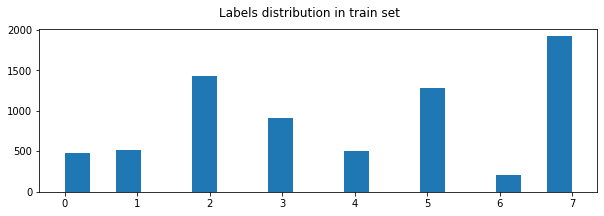

In [ ]:
# Displaying train set distribution
# 128 stands for number of different classes in labels
fig=plt.figure(figsize=(10, 3))
plt.hist(labels_train, bins=20)
fig.suptitle('Labels distribution in train set')
plt.show()

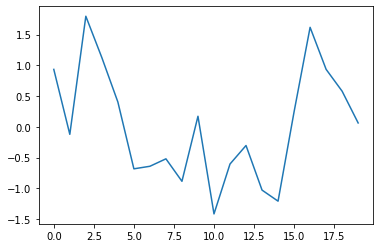

In [ ]:
# for _ in range(1, 4):
    
    # sample_index = random.randint(0, len(sample))
    # fig=plt.figure(figsize=(10, 3))
    # plt.plot(sample[sample_index])
    # fig.suptitle(labels_train[sample_index])
    # plt.show()

sample_index = 0
# fig=plt.figure(figsize=(10, 3))
plt.plot(sample[sample_index])
fig.suptitle(labels_train[sample_index])
plt.show()

#Model

In [127]:
# Scaling samples
scaler = StandardScaler().fit(sample)
sample = scaler.transform(sample)

Logistic regression¶

In [139]:
#need to find a better threshhold of categorizing floats to 0 or 1
RG_label = [int(labels_train) for labels_train in labels_train]
print(labels_train)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [140]:
clf_logistic = LogisticRegression(random_state=0,
                                  solver='liblinear').fit(sample, RG_label)

In [141]:
clf_logistic.score(sample, RG_label)

0.7628054673477841

In [142]:
test = []
test.append(sample[0])
#probability of output prediction to 0 or 1
clf_logistic.predict_proba(test)

array([[0.82229898, 0.17770102]])

In [159]:
print(clf_logistic.predict(test))
print(RG_label[0])

[0]
1


SVM

In [187]:
# clf_linear_SVC = LinearSVC(C=1.0,
#                           class_weight=None,
#                           dual=False,
#                           fit_intercept=True,
#                           intercept_scaling=1,
#                           loss='squared_hinge',
#                           max_iter=200,
#                           penalty='l2', 
#                           random_state=0, 
#                           tol=1e-05, 
#                           verbose=0).fit(sample, labels_train)

from sklearn.svm import SVR

clf_linear_SVC = svm.SVR(kernel='linear', C = 1.0)
clf_linear_SVC.fit(sample,labels_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
clf_linear_SVC.score(sample, labels_train)

-0.14211289657878012

In [184]:
test = []
test.append(sample[600])
#probability of output prediction to 0 or 1
print(clf_linear_SVC.predict(test))
print(labels_train[500])

[0.4965675]
0.9


Neural Network

In [173]:
clf_neural = MLPClassifier(random_state=1, max_iter=300).fit(sample, labels_train)

ValueError: ignored